In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2024-02-12,415.2600,-0.0126
2024-02-13,406.3200,-0.0215
2024-02-14,409.4900,0.0078


In [3]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2024-02-12,415.2600,-0.0126,-0.0127
2024-02-13,406.3200,-0.0215,-0.0218
2024-02-14,409.4900,0.0078,0.0078


In [4]:
msft.describe()

,Price,Returns,log_ret
count,2361.0000,2360.0000,2360.0000
mean,161.9817,0.0011,0.0009
std,103.7883,0.0174,0.0174
min,40.2900,-0.1474,-0.1595
25%,63.9800,-0.0071,-0.0071
50%,132.1000,0.0008,0.0008
75%,252.5100,0.0100,0.0099
max,420.5500,0.1422,0.1329


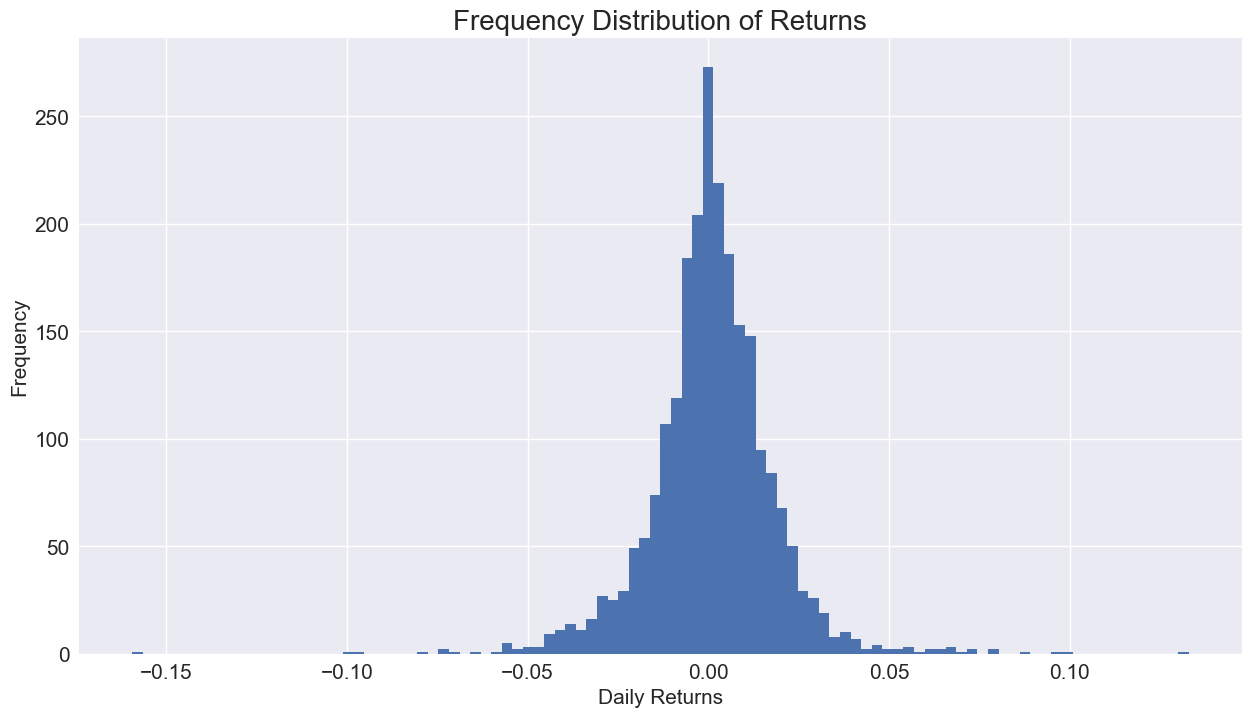

In [20]:
#하루 평균 수익율의 빈도수를 나타내는 표 
msft.log_ret.plot(kind = "hist", figsize = (15,8), bins = 100, fontsize = 15, density = False) 
#False 시 절대 도수들로 이뤄진 도수 분포도이며 True로 바꿀 시 정규화 할 수 있다.
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

In [9]:
mu = msft.log_ret.mean()
mu

0.0009216517904377777

In [10]:
sigma = msft.log_ret.std()
sigma

0.01736957302587373

In [11]:
import scipy.stats as stats

In [13]:
stats.skew(msft.log_ret.dropna())
#skew() 메서드는 데이터의 왜도(skewness)를 계산하는 데 사용됩니다. 
#왜도는 데이터의 분포가 평균 주위에 얼마나 비대칭적으로 분포하는지를 나타내는 지표입니다. 
#왜도는 분포의 대칭성에 대한 측정으로, 왜도 값이 0에 가까울수록 데이터 분포가 대칭적이고, 
#왜도 값이 양수이면 오른쪽으로 긴 꼬리가 있으며,음수이면 왼쪽으로 긴 꼬리가 있습니다.

-0.14510819275750858

In [15]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True)
#kurtosis() 메서드는 데이터의 첨도(kurtosis)를 계산하는 데 사용됩니다. 
#첨도는 데이터 분포의 꼬리 부분이 얼마나 두껍거나 가늘게 분포하는지를 나타내는 지표입니다. 
#첨도는 데이터의 뾰족한 정도를 나타내며, 
#일반적으로 정규 분포와 비교하여 분포의 뾰족한 정도를 측정합니다. 
#첨도가 0에 가까울수록 정규 분포에 가깝고, 
#양수이면 정규 분포보다 뾰족하고, 음수이면 정규 분포보다 더 평평한 분포입니다.

7.948131585676901

In [16]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [18]:
y = stats.norm.pdf(x, loc = mu, scale = sigma)
y

array([7.06765514e-18, 7.17836041e-18, 7.29077907e-18, ...,
       6.76203556e-12, 6.67609995e-12, 6.59123777e-12])

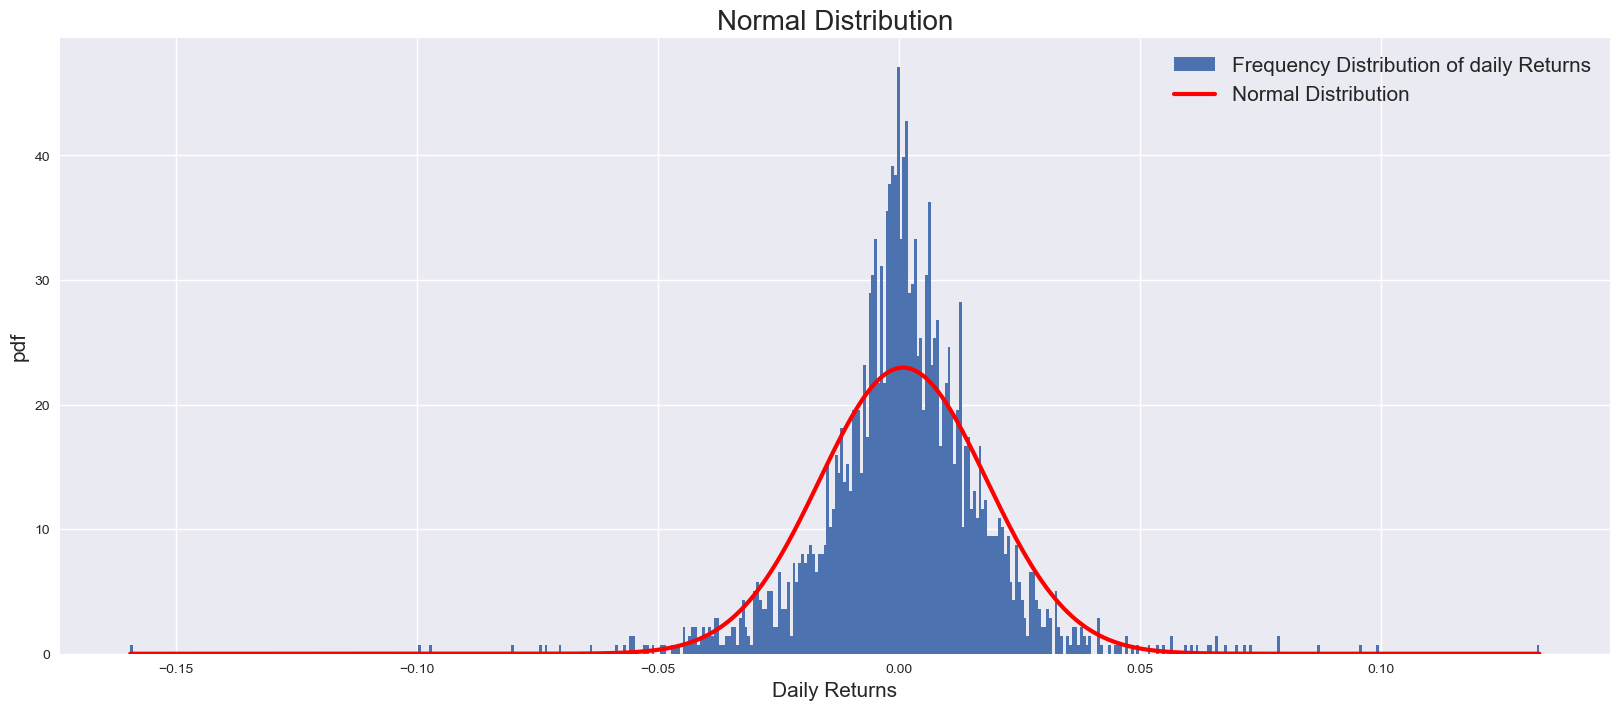

In [26]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize= 15)
plt.ylabel("pdf", fontsize= 15)
plt.legend(fontsize = 15)
plt.show()
#파란색 => 도수분포
#붉은선 => 정규분포
#density = Ture를 넣음으로써 붉은선의 정규분포와 비교 가능하게 만들었다.

In [27]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [28]:
z_stat

376.3328618534745

In [29]:
p_value

1.9070293149271833e-82

In [30]:
round(p_value, 10)

0.0

주어진 문제는 Microsoft(MSFT) 주식의 수익률이 정규 분포를 따르는지 여부를 가설 검정을 통해 확인하는 것이다.

가설 검정은 보통 귀무 가설(H0)과 대립 가설(H1)을 설정하여 이지며, 다음과 같다.다:

귀무 가설(H0): MSFT 주식의 수익률은 정규 분포를 따른다.
대립 가설(H1): MSFT 주식의 수익률은 정규 분포를 따르지 있습니다. 일반적으로는 Shapiro-Wilk 검정 또는 Kolmogorov-Smirnov 검정과 같은 정규성 검정 통계 방법을 사용하여 수행할 수 있습니다. 이러한 검정을 통해 p-value를 계산하고, 유의 수준 (예: 0.05)과 비교하여 귀무 가설을 기각하거나 기각하지 다. 있습니다.

만약 p-value가 유의 수준보다 작다면, 귀무 가설을 기각하고 대립 가설을 채택합니다. 즉, MSFT 주식의 수익률은 정규 분는다르지 않습니다. 그러나 p-value가 유의 수준보다 크거나 같으면, 귀무 가설을 기각할 수 없으므로, MSFT 주식의 수익률은 정규 분포를 따른다는 적다.거가 없습니다음과 같이 해석된다.행될 수 있습니다:

만약 p-value가 유의 수준보다 작으면, "MSFT 주식의 수익률은 정규 분포를 따르지 않음"을 고, 도출할 수 있습니다.
만약 p-value가 유의 수준보다 크거나 같으면, "MSFT 주식의 수익률은 정규 분포를 따른다는 적절한 증거가 없음 있다.로 도출할 수 있습니다.
이러한 가설 검정을 통해 MSFT 주식의 수익률이 정규 분포를 따르다.부를 결정할 수 있습니다..